In [1]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [2]:
#Import all the data

#Households data
houses = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_person.csv', encoding = "ISO-8859-1")

#Trips data
obd_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/obd_gpstrips.csv', encoding = "ISO-8859-1")
vgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")
wgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/w_gpstrips.csv', encoding = "ISO-8859-1")

/Users/david/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,46,50,51,102,105,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
h = houses[['sampno', 'empl_status']]
h.head()

,sampno,empl_status
0,7128119,NaN
1,7128119,6.0
2,7128138,NaN
3,7128262,3.0
4,7128262,NaN


In [4]:
#get rid of all the Nan's
hhs = h.dropna()
hhs

,sampno,empl_status
1,7128119,6.0
3,7128262,3.0
5,7128262,1.0
6,7128288,2.0
7,7128288,1.0
9,7128372,4.0
11,7128401,1.0
13,7128401,6.0
14,7128439,3.0
18,7129767,3.0


In [6]:
hh_empl_status = hhs.sort_values("empl_status").groupby("sampno", as_index=False).first()
hh_empl_status

,sampno,empl_status
0,1031985,1.0
1,1032036,3.0
2,1032053,2.0
3,1032558,1.0
4,1033586,1.0
5,1033660,1.0
6,1034462,2.0
7,1034878,4.0
8,1035274,1.0
9,1035364,1.0


In [8]:
#test if there is any duplicates

test = hh_empl_status['sampno']
lis = []

for t in test:
    lis.append(t)
    
len(lis) == len(set(lis))

True

In [9]:
#make a list of households

hhs_sampleno = hhs["sampno"]

list_houses = set([]) #so no duplicates
for s in hhs_sampleno:
    list_houses.add(s)
    
list_houses

{2621444,
 7208966,
 7208971,
 2621453,
 1703959,
 2621464,
 7208991,
 3014694,
 2490410,
 1835066,
 7077954,
 1835084,
 1966158,
 1441871,
 2490449,
 2490453,
 3014752,
 1966178,
 1835107,
 2490472,
 2621544,
 7209067,
 2752633,
 1704062,
 1835135,
 1048704,
 1441922,
 7209091,
 2490503,
 2883720,
 3014793,
 1966220,
 2490508,
 7209103,
 2621584,
 1048730,
 1835163,
 2490525,
 1704095,
 1048736,
 2752683,
 7209132,
 1966260,
 2621627,
 1966269,
 1835198,
 1835204,
 1704136,
 1704150,
 2490585,
 1835230,
 2883810,
 1442032,
 1442036,
 1835255,
 1835262,
 1966335,
 2752777,
 7209228,
 7209242,
 1704221,
 2621727,
 1704224,
 2752802,
 7209266,
 1442099,
 7209276,
 2752831,
 2752832,
 1442113,
 7209286,
 2490729,
 1442155,
 1704317,
 2490779,
 3015069,
 1442208,
 7209394,
 7209398,
 1835447,
 1835455,
 1180096,
 1704388,
 3015108,
 2621894,
 1966537,
 2752982,
 2097623,
 7209432,
 7209437,
 7078365,
 3015159,
 2621947,
 1442326,
 1442328,
 3015197,
 1835564,
 7078452,
 2884149,
 1442359,


In [10]:
#Get all the trips into one Series
vgps = vgps_trips['sampno']
obd = obd_trips['sampno']
wgps = wgps_trips['sampno']

#Check the size of the Series
print(vgps.size + obd.size+ wgps.size)

204633


In [11]:
series1 = vgps.append(obd)
series1.size

83034

In [12]:
series2 = series1.append(wgps)
series2.size

204633

In [13]:
#check size of series is the accurate
series = series2.copy(deep = True)
series.size

204633

In [14]:
#make a dictionary with sampno mapped to residence type
mapping = {}

for row in hh_empl_status.values:
    s_num = int(row[0])
    educ = row[1]
    mapping[s_num] = educ

print(mapping)

{1031985: 1.0, 1032036: 3.0, 1032053: 2.0, 1032558: 1.0, 1033586: 1.0, 1033660: 1.0, 1034462: 2.0, 1034878: 4.0, 1035274: 1.0, 1035364: 1.0, 1035438: 1.0, 1036062: 1.0, 1036222: 2.0, 1037751: 2.0, 1037895: 1.0, 1037952: 2.0, 1038024: 1.0, 1038232: 1.0, 1038404: 1.0, 1038428: 4.0, 1039341: 4.0, 1039423: 2.0, 1039620: 1.0, 1039879: 1.0, 1041076: 1.0, 1041305: 4.0, 1041494: 1.0, 1041770: 3.0, 1041879: 4.0, 1041948: 1.0, 1042241: 1.0, 1042679: 3.0, 1044265: 5.0, 1044302: 2.0, 1044414: 2.0, 1044596: 2.0, 1044767: 3.0, 1044940: 1.0, 1044978: 2.0, 1045386: 3.0, 1045587: 1.0, 1046885: 6.0, 1046924: 1.0, 1047092: 3.0, 1048704: 3.0, 1048730: 2.0, 1048736: 3.0, 1049769: 1.0, 1050315: 1.0, 1050668: 1.0, 1050783: 1.0, 1051191: 2.0, 1051388: 3.0, 1051649: 1.0, 1051795: 3.0, 1052241: 1.0, 1052523: 2.0, 1053095: 1.0, 1053110: 1.0, 1054159: 4.0, 1054803: 4.0, 1054933: 1.0, 1055111: 2.0, 1055784: 3.0, 1055989: 1.0, 1056168: 2.0, 1056368: 3.0, 1056450: 1.0, 1056785: 3.0, 1057600: 1.0, 1058056: 3.0, 10584

In [15]:
counts = defaultdict(int)

#now iterate through data
for trip in series:
    
    #print(trip)
    #get the residence type of each
 
    if trip not in list_houses:
        pass
    else:
        add_on = mapping[trip]
       # print(add_on)
        counts[add_on] += 1
    
   # add_on = mapping[trip]
    #counts[add_on] += 1
    
counts

defaultdict(int,
            {1.0: 35962,
             4.0: 12595,
             3.0: 24157,
             6.0: 24702,
             2.0: 8508,
             99.0: 177,
             5.0: 2262,
             7.0: 1206,
             97.0: 321,
             98.0: 25})

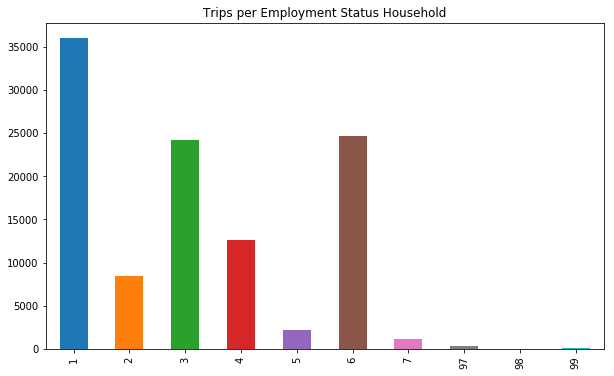

In [17]:
#build the Series
trip_counts_Series = pd.Series([35962, 8508, 24157, 12595, 2262, 24702, 1206, 321, 25, 177], index= ['1','2','3','4','5','6','7','97','98','99'])

#build the plot from "trip_counts_Series"
trip_count_plot = trip_counts_Series.plot(kind='bar', title="Trips per Employment Status Household", figsize=(10,6))